# Step 1: Preprocessing 

In [259]:
#Import Libraries and Dependencies 
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler 

In [260]:
# Import CSV and Convert to DataFrame 
df1 = pd.read_csv(Path('/Users/kristenmaskery/Desktop/CrimeStoppers/Resources/crime_rate.csv'))
df1=pd.DataFrame(df1)
df1.tail()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
206430,-8.855354e+06,5.426936e+06,206214,GO-20191554251,2019/08/13 04:00:00+00,2019/08/16 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,17,Auto Theft,D31,21,Humber Summit (21),43.750652,-79.549,206431
206431,-8.847784e+06,5.416596e+06,206215,GO-20191535011,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Commercial,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,14,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.683521,-79.481,206432
206432,-8.857803e+06,5.428142e+06,206216,GO-20191534561,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,13,Auto Theft,D31,21,Humber Summit (21),43.758480,-79.571,206433
206433,-8.850567e+06,5.415343e+06,206217,GO-20191536931,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,11,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.675377,-79.506,206434
206434,-8.849009e+06,5.421924e+06,206218,GO-20191539696,2019/08/13 04:00:00+00,2019/08/14 04:00:00+00,House,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,22,Auto Theft,D12,29,Maple Leaf (29),43.718124,-79.492,206435


In [261]:
#Drop Unnesccesary Columns in Crime Df 
df1.drop('X', axis=1, inplace=True)
df1.drop('Y', axis=1, inplace=True)
df1.drop('reporteddate', axis=1, inplace=True)
df1.drop('premisetype', axis=1, inplace=True)
df1.drop('ucr_code', axis=1, inplace=True)
df1.drop('ucr_ext', axis=1, inplace=True)
df1.drop('Index_', axis=1, inplace=True)
df1.drop('event_unique_id', axis=1, inplace=True)
df1.drop('occurrencedayofyear', axis=1, inplace=True)
df1.drop('reportedmonth', axis=1, inplace=True)
df1.drop('reportedday', axis=1, inplace=True)
df1.drop('reporteddayofyear', axis=1, inplace=True)
df1.drop('reporteddayofweek', axis=1, inplace=True)
df1.drop('reportedhour', axis=1, inplace=True)
df1.drop('occurrenceyear', axis=1, inplace=True)
df1.drop('Division', axis=1, inplace=True)
df1.drop('Hood_ID', axis=1, inplace=True)
df1.drop('Neighbourhood', axis=1, inplace=True)
df1.drop('Lat', axis=1, inplace=True)
df1.drop('Long', axis=1, inplace=True)
df1.drop('ObjectId', axis=1, inplace=True)
df1.drop('offence', axis=1, inplace=True)
df1

,occurrencedate,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI
0,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
1,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
2,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
3,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22,Assault
4,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,21,Break and Enter
...,...,...,...,...,...,...,...
206430,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,17,Auto Theft
206431,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,14,Auto Theft
206432,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,13,Auto Theft
206433,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,11,Auto Theft


In [262]:
#Strip Date Column 
df1['occurrencedate'] = df1['occurrencedate'].map(lambda x: str(x)[:+10])
df1

,occurrencedate,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI
0,2014/01/07,2014,January,7.0,Tuesday,22,Assault
1,2014/01/07,2014,January,7.0,Tuesday,22,Assault
2,2014/01/07,2014,January,7.0,Tuesday,22,Assault
3,2014/01/07,2014,January,7.0,Tuesday,22,Assault
4,2014/01/07,2014,January,7.0,Tuesday,21,Break and Enter
...,...,...,...,...,...,...,...
206430,2019/08/13,2019,August,13.0,Tuesday,17,Auto Theft
206431,2019/08/13,2019,August,13.0,Tuesday,14,Auto Theft
206432,2019/08/13,2019,August,13.0,Tuesday,13,Auto Theft
206433,2019/08/13,2019,August,13.0,Tuesday,11,Auto Theft


In [263]:
#Rename Occurence Column to merge with df2
df1 = df1.rename({'occurrencedate': 'Date'}, axis=1)
df1 = df1.rename({'occurrencehour':'hour_num'}, axis=1)          
df1.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI
0,2014/01/07,2014,January,7.0,Tuesday,22,Assault
1,2014/01/07,2014,January,7.0,Tuesday,22,Assault
2,2014/01/07,2014,January,7.0,Tuesday,22,Assault
3,2014/01/07,2014,January,7.0,Tuesday,22,Assault
4,2014/01/07,2014,January,7.0,Tuesday,21,Break and Enter


In [264]:
# convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '11-14-2018'
#Add them to the df2
mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
df1 = df1.loc[mask]
df1
#convert occurenceday column to integer
df1['occurrenceday'] = df1['occurrenceday'].astype(int)
df1.dtypes

Date                   datetime64[ns]
reportedyear                    int64
occurrencemonth                object
occurrenceday                   int64
occurrencedayofweek            object
hour_num                        int64
MCI                            object
dtype: object

In [265]:
#read in temperature data 
df2 = pd.read_csv(Path('/Users/kristenmaskery/Desktop/CrimeStoppers/Resources/Toronto_temp_clean.csv'))
df2=pd.DataFrame(df2)
df2

,Date_,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2884,1941-12-01,1941,12,1,-1.5,41.1,Winter,Yes,Yes
2885,1940-12-01,1940,12,1,-3.6,82.6,Winter,Yes,Yes
2886,1939-12-01,1939,12,1,NaN,NaN,Winter,No,No
2887,1938-12-01,1938,12,1,-2.5,27.4,Winter,Yes,Yes


In [266]:
#Rename Date_ Column to merge with df1
df2 = df2.rename({'Date_': 'Date'}, axis=1)
df2.head()

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No


In [267]:
#Convert Date column to date time 
df2['Date'] = pd.to_datetime(df2['Date']) 
df2.head()
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '01-01-2019'
#Add them to the df2
mask = (df2['Date'] > start_date) & (df2['Date'] <= end_date)
df2 = df2.loc[mask]
#Sort Values from 2014 to 2018
df2.sort_values(by=['Date'], inplace=True, ascending=True)
df2

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
146,2014-01-09,"2,014",1,9,-11.0,0.0,Winter,No,No
145,2014-01-10,"2,014",1,10,-3.0,3.0,Winter,Yes,Yes
144,2014-01-11,"2,014",1,11,4.0,8.0,Winter,Yes,No
143,2014-01-12,"2,014",1,12,1.0,0.0,Winter,No,No
142,2014-01-13,"2,014",1,13,4.0,1.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2422,2018-11-10,"2,018",11,10,0.0,0.0,Fall,No,No
2421,2018-11-11,"2,018",11,11,1.0,0.0,Fall,No,No
2420,2018-11-12,"2,018",11,12,4.0,1.0,Fall,Yes,No
2419,2018-11-13,"2,018",11,13,-1.0,1.0,Fall,Yes,No


In [268]:
#Export cleaned DataFrames & Connect to AWS 
#df1.to_csv('cleaned_crime_rate.csv', index = False)
#df2.to_csv('cleaned_temp_rate.csv', index = False)

In [269]:
#Import dependencies to connect the database 
from sqlalchemy import create_engine
from config import DB_HOST, DB_NAME,DB_USER,DB_PASS
import psycopg2

In [270]:
#store credentials in a variable 
conn = psycopg2.connect(dbname=DB_NAME, user=DB_USER,password=DB_PASS,host=DB_HOST)

In [271]:
#connect to database
cur = conn.cursor()

In [272]:
#connect to desired table "merged_df"
cur.execute("SELECT * FROM merged_df;")

In [273]:
#print table 
print(cur.fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [274]:
import pandas.io.sql as sqlio

In [275]:
#Read database into a dataframe 
sql = "SELECT * FROM merged_df;"

In [276]:
merged_df = sqlio.read_sql_query(sql, conn)

In [277]:
#convert date column to datetime format
merged_df['date_'] = pd.to_datetime(merged_df['date_'], infer_datetime_format=True)

merged_df.dtypes

date_                  datetime64[ns]
reportedyear                    int64
occurrencemonth                object
occurrenceday                   int64
occurrencedayofweek            object
hour_num                        int64
mci                            object
month_                        float64
day_                          float64
mean_temp                     float64
total_precip                  float64
season                         object
rain                           object
snow                           object
dtype: object

In [278]:
#Clean merged df 
merged_df.drop('Year_', axis=1, inplace=True)
merged_df.drop('day_', axis=1, inplace=True)
merged_df.drop('month_', axis=1, inplace=True)
merged_df

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,month_,day_,mean_temp,total_precip,season,rain,snow
0,2014-01-09,2014,January,9,Thursday,22,Assault,1.0,9.0,-11.0,0.0,Winter,No,No
1,2014-01-09,2014,January,9,Thursday,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No
2,2014-01-09,2014,January,9,Thursday,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No
3,2014-01-09,2014,January,9,Thursday,21,Robbery,1.0,9.0,-11.0,0.0,Winter,No,No
4,2014-01-09,2014,January,9,Thursday,10,Theft Over,1.0,9.0,-11.0,0.0,Winter,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162091,2018-11-06,2018,November,6,Tuesday,6,Auto Theft,11.0,6.0,12.0,7.0,Fall,Yes,No
162092,2018-11-06,2018,November,6,Tuesday,19,Auto Theft,11.0,6.0,12.0,7.0,Fall,Yes,No
162093,2018-11-06,2018,November,6,Tuesday,22,Auto Theft,11.0,6.0,12.0,7.0,Fall,Yes,No
162094,2018-11-06,2018,November,6,Tuesday,22,Auto Theft,11.0,6.0,12.0,7.0,Fall,Yes,No


In [279]:
#Create Second Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["mci"])

LabelEncoder()

In [280]:
#MCI Dictionary
Offences_num = {
    "Assault": 1,
    "Auto Theft": 2,
    "Break and Enter": 3,
    "Robbery": 4,
    "Theft Over":5,
}
#Add MCI Dictionary to DataFrame
merged_df["Offences_type"] = merged_df["mci"].apply(lambda x: Offences_num[x])
merged_df.head()
# Drop MCI & Offences_Type Columns 
#merged_df.drop(["MCI", "Offences_Type"], axis=1, inplace=True)
#merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,month_,day_,mean_temp,total_precip,season,rain,snow,Offences_type
0,2014-01-09,2014,January,9,Thursday,22,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1
1,2014-01-09,2014,January,9,Thursday,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1
2,2014-01-09,2014,January,9,Thursday,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1
3,2014-01-09,2014,January,9,Thursday,21,Robbery,1.0,9.0,-11.0,0.0,Winter,No,No,4
4,2014-01-09,2014,January,9,Thursday,10,Theft Over,1.0,9.0,-11.0,0.0,Winter,No,No,5


In [281]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencedayofweek"])
# List the Encoded Classes
list(label_encoder.classes_)

['Friday    ',
 'Monday    ',
 'Saturday  ',
 'Sunday    ',
 'Thursday  ',
 'Tuesday   ',
 'Wednesday ']

In [282]:
#Weekday Dictionary
Week_day_num = {
    "Monday    ": 1,
    "Tuesday   ": 2,
    "Wednesday ": 3,
    "Thursday  ": 4,
    "Friday    ": 5,
    "Saturday  ": 6,
    "Sunday    ": 7,
}
#Add Months Dictionary to DataFrame
merged_df["occurrencedayofweek"] = merged_df["occurrencedayofweek"].apply(lambda x: Week_day_num[x])
merged_df.head()
#Drop columns
#merged_df.drop(["occurrencedayofweek"], axis=1, inplace=True)
#merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,month_,day_,mean_temp,total_precip,season,rain,snow,Offences_type
0,2014-01-09,2014,January,9,4,22,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1
1,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1
2,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1
3,2014-01-09,2014,January,9,4,21,Robbery,1.0,9.0,-11.0,0.0,Winter,No,No,4
4,2014-01-09,2014,January,9,4,10,Theft Over,1.0,9.0,-11.0,0.0,Winter,No,No,5


In [283]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencemonth"])
# List the Encoded Classes
list(label_encoder.classes_)

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [284]:
#Month Dictionary
months_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
#Add Months Dictionary to DataFrame
merged_df["Month"] = merged_df["occurrencemonth"].apply(lambda x: months_num[x])
merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,month_,day_,mean_temp,total_precip,season,rain,snow,Offences_type,Month
0,2014-01-09,2014,January,9,4,22,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1,1
1,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1,1
2,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1,1
3,2014-01-09,2014,January,9,4,21,Robbery,1.0,9.0,-11.0,0.0,Winter,No,No,4,1
4,2014-01-09,2014,January,9,4,10,Theft Over,1.0,9.0,-11.0,0.0,Winter,No,No,5,1


In [285]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["season"])

LabelEncoder()

In [286]:
# List the Encoded Classes
list(label_encoder.classes_)

#Seasons Dictionary
seasons_num = {
    "Fall": 1,
    "Spring": 2,
    "Summer": 3,
    "Winter": 4,
}
#Add Months Dictionary to DataFrame
merged_df["Seasons_Num"] = merged_df["season"].apply(lambda x: seasons_num[x])
merged_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,month_,day_,mean_temp,total_precip,season,rain,snow,Offences_type,Month,Seasons_Num
0,2014-01-09,2014,January,9,4,22,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1,1,4
1,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1,1,4
2,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,No,No,1,1,4
3,2014-01-09,2014,January,9,4,21,Robbery,1.0,9.0,-11.0,0.0,Winter,No,No,4,1,4
4,2014-01-09,2014,January,9,4,10,Theft Over,1.0,9.0,-11.0,0.0,Winter,No,No,5,1,4


In [287]:
#Dummy Encoding the Rain & Snow Columns
temp_binary_encoded_df = pd.get_dummies(merged_df, columns=["rain", "snow"])
temp_binary_encoded_df.head()

,date_,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,mci,month_,day_,mean_temp,total_precip,season,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,January,9,4,22,Assault,1.0,9.0,-11.0,0.0,Winter,1,1,4,1,0,1,0
1,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,1,1,4,1,0,1,0
2,2014-01-09,2014,January,9,4,17,Assault,1.0,9.0,-11.0,0.0,Winter,1,1,4,1,0,1,0
3,2014-01-09,2014,January,9,4,21,Robbery,1.0,9.0,-11.0,0.0,Winter,4,1,4,1,0,1,0
4,2014-01-09,2014,January,9,4,10,Theft Over,1.0,9.0,-11.0,0.0,Winter,5,1,4,1,0,1,0


In [288]:
#Drop uneccesary columns 
temp_binary_encoded_df.drop('occurrencemonth', axis=1, inplace=True)
temp_binary_encoded_df.drop('mci', axis=1, inplace=True)
temp_binary_encoded_df.drop('season', axis=1, inplace=True)
temp_binary_encoded_df.head()

,date_,reportedyear,occurrenceday,occurrencedayofweek,hour_num,month_,day_,mean_temp,total_precip,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,9,4,22,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
1,2014-01-09,2014,9,4,17,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
2,2014-01-09,2014,9,4,17,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
3,2014-01-09,2014,9,4,21,1.0,9.0,-11.0,0.0,4,1,4,1,0,1,0
4,2014-01-09,2014,9,4,10,1.0,9.0,-11.0,0.0,5,1,4,1,0,1,0


In [289]:
temp_binary_encoded_df.head()

,date_,reportedyear,occurrenceday,occurrencedayofweek,hour_num,month_,day_,mean_temp,total_precip,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,9,4,22,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
1,2014-01-09,2014,9,4,17,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
2,2014-01-09,2014,9,4,17,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
3,2014-01-09,2014,9,4,21,1.0,9.0,-11.0,0.0,4,1,4,1,0,1,0
4,2014-01-09,2014,9,4,10,1.0,9.0,-11.0,0.0,5,1,4,1,0,1,0


In [290]:
# Saving the encoded dataset
temp_binary_encoded_df.to_csv('temp_binary_encoded_df.csv', index = False)

In [291]:
temp_binary_encoded_df.drop_duplicates
temp_binary_encoded_df.head()

,date_,reportedyear,occurrenceday,occurrencedayofweek,hour_num,month_,day_,mean_temp,total_precip,Offences_type,Month,Seasons_Num,rain_No,rain_Yes,snow_No,snow_Yes
0,2014-01-09,2014,9,4,22,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
1,2014-01-09,2014,9,4,17,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
2,2014-01-09,2014,9,4,17,1.0,9.0,-11.0,0.0,1,1,4,1,0,1,0
3,2014-01-09,2014,9,4,21,1.0,9.0,-11.0,0.0,4,1,4,1,0,1,0
4,2014-01-09,2014,9,4,10,1.0,9.0,-11.0,0.0,5,1,4,1,0,1,0


In [292]:
#Create a DataFrame of the Aggregate Crime Rate 
crime_month = pd.DataFrame(temp_binary_encoded_df.Month.value_counts().reset_index().values, columns=["Month", "AggregateCrime"])
crime_month_index = crime_month.sort_index(axis = 0, ascending=True)
crime_month_index 

,Month,AggregateCrime
0,10,14959
1,7,14697
2,5,14577
3,8,14543
4,6,14466
5,9,14361
6,4,13418
7,3,13078
8,11,12997
9,1,12475


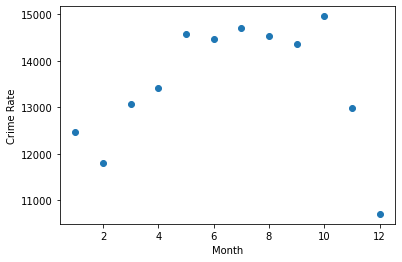

In [293]:
#Visualize Correlation betweeen Aggregate Crime Rate and Month
plt.scatter(crime_month_index.Month, crime_month_index.AggregateCrime)
plt.xlabel('Month') 
plt.ylabel('Crime Rate')
plt.show()

In [294]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr = crime_month_index.corr(method='pearson')
pearsoncorr 

,Month,AggregateCrime
Month,1.000000,0.087221
AggregateCrime,0.087221,1.000000


In [295]:
#Create a DataFrame of the Aggregate Crime Rate by Day of the Week 
Week_rate = pd.DataFrame(temp_binary_encoded_df.occurrencedayofweek.value_counts().reset_index().values, columns=["Day_Of_Week", "AggregateCrime"])
Week_rate_index = Week_rate.sort_index(axis = 0, ascending=True)
Week_rate_index

,Day_Of_Week,AggregateCrime
0,5,24648
1,6,24370
2,7,23533
3,4,22759
4,3,22433
5,1,22364
6,2,21989


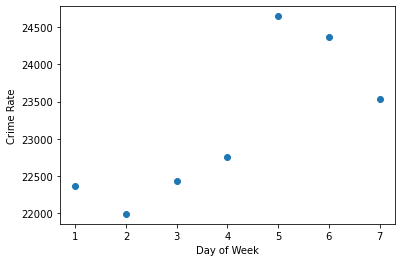

In [296]:
#Visualize Correlation betweeen Aggregate Crime Rate and Day of the Week 
plt.scatter(Week_rate_index.Day_Of_Week, Week_rate_index.AggregateCrime)
plt.xlabel('Day of Week') 
plt.ylabel('Crime Rate')
plt.show()

In [297]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_week = Week_rate_index.corr(method='pearson')
pearsoncorr_week

,Day_Of_Week,AggregateCrime
Day_Of_Week,1.000000,0.776441
AggregateCrime,0.776441,1.000000


In [298]:
#Create a DataFrame of the Aggregate Crime Rate by Hour (24hr) 
hour_rate = pd.DataFrame(temp_binary_encoded_df.hour_num.value_counts().reset_index().values, columns=["Hour", "AggregateCrime"])
hour_crime_rate_index = hour_rate.sort_index(axis = 0, ascending=True)
hour_crime_rate_index.head()


,Hour,AggregateCrime
0,0,10403
1,12,9092
2,21,8788
3,18,8741
4,20,8651


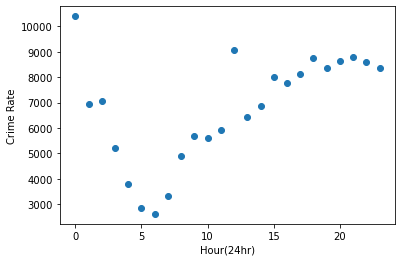

In [299]:
#Visualize Correlation betweeen Aggregate Crime Rate and Hour (24hr) 
plt.scatter(hour_crime_rate_index.Hour, hour_crime_rate_index.AggregateCrime)
plt.xlabel('Hour(24hr)') 
plt.ylabel('Crime Rate')
plt.show()

In [300]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_hour = hour_crime_rate_index.corr(method='pearson')
pearsoncorr_hour

,Hour,AggregateCrime
Hour,1.000000,0.514109
AggregateCrime,0.514109,1.000000


In [301]:
#Create a DataFrame of the Aggregate Crime Rate by Temperature
Temp_rate = pd.DataFrame(temp_binary_encoded_df.mean_temp.value_counts().reset_index().values, columns=["Mean_temp", "AggregateCrime"])
temp_crime_rate_index = Temp_rate.sort_index(axis = 0, ascending=True)
temp_crime_rate_index.head()

,Mean_temp,AggregateCrime
0,22.0,7197.0
1,17.0,6234.0
2,19.0,6151.0
3,20.0,6126.0
4,21.0,5994.0


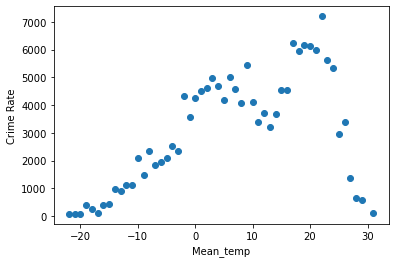

In [302]:
#Visualize Correlation betweeen Aggregate Crime Rate and Temperature 
plt.scatter(temp_crime_rate_index.Mean_temp, temp_crime_rate_index.AggregateCrime)
plt.xlabel('Mean_temp') 
plt.ylabel('Crime Rate')
plt.show()

In [303]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_temp = temp_crime_rate_index.corr(method='pearson')
pearsoncorr_temp

,Mean_temp,AggregateCrime
Mean_temp,1.000000,0.570894
AggregateCrime,0.570894,1.000000


# Step 2: Apply Machine Learning Models

In [304]:
#Analyze the Correlation Between Mean Temperature and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = temp_crime_rate_index.Mean_temp.values.reshape(-1, 1)
y = temp_crime_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(53, 1)

In [305]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [306]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [307]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [308]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(11, 1)
(11, 1)


In [309]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,597.0,4957.233357
1,2108.0,2366.059256
2,1127.0,1832.582236
3,2106.0,1985.004242
4,4698.0,3051.958283
5,6151.0,4195.123327
6,2332.0,2518.481262
7,897.0,1756.371233
8,2533.0,2442.270259
9,3374.0,4728.600348


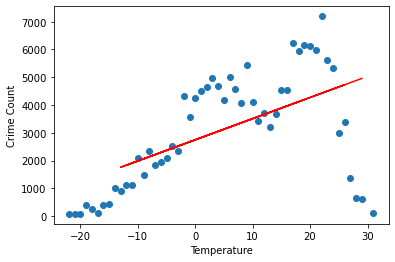

In [310]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Temperature')
plt.show()

In [311]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[76.21100295]]
[2747.11427117]


In [312]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1198.5842043261398
Mean Squared Error: 2859354.8907539477
Root Mean Squared Error: 1690.9627112251612


In [313]:
#Analyze the Correlation Between Month and Aggregate Crime Using a Linear Regression Model 
#Assign X and Y Variables 
X = crime_month_index.Month.values.reshape(-1, 1)
y = crime_month_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(12, 1)

In [314]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [315]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [316]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [317]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(3, 1)
(3, 1)


In [318]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13418,13427.283217
1,10710,13685.576923
2,14466,13491.856643


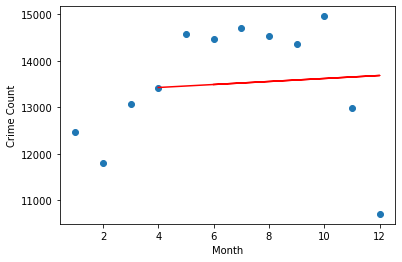

In [319]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Month')
plt.show()

In [320]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[32.28671329]]
[13298.13636364]


In [321]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1319.6678321678326
Mean Squared Error: 3267699.8275180547
Root Mean Squared Error: 1807.6780209755427


In [322]:
#Analyze the Correlation Between Day of the Week and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = Week_rate_index.Day_Of_Week.values.reshape(-1, 1)
y = Week_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(7, 1)

In [323]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [324]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [325]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [326]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(2, 1)
(2, 1)


In [327]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,21989,22407.714286
1,23533,24279.857143


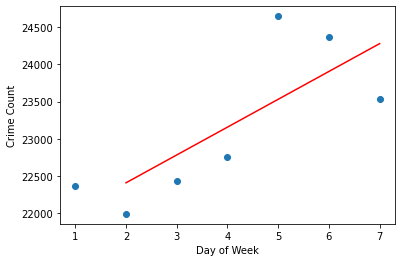

In [328]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Day of Week')
plt.show()

In [329]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[374.42857143]]
[21658.85714286]


In [330]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 582.785714285712
Mean Squared Error: 366558.6224489771
Root Mean Squared Error: 605.4408496698725


In [331]:
#Analyze the Correlation Between Hour of the Day and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = hour_crime_rate_index.Hour.values.reshape(-1, 1)
y = hour_crime_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(24, 1)

In [332]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [333]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [334]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [335]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(5, 1)
(5, 1)


In [336]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,7047,5274.593913
1,7766,7454.771304
2,2856,5741.774783
3,6424,6987.590435
4,3777,5586.047826


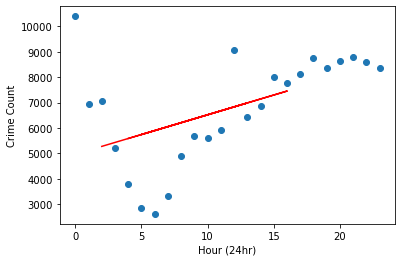

In [337]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Hour (24hr)')
plt.show()

In [338]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[155.72695652]]
[4963.14]


In [339]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1468.4095652173914
Mean Squared Error: 3031254.189853309
Root Mean Squared Error: 1741.0497379033459


In [340]:
from fbprophet import Prophet

In [346]:
prophet_df = pd.DataFrame(temp_binary_encoded_df.date_.value_counts().reset_index().values, columns=["ds", "y"])
prophet_df_index = prophet_df.sort_index(axis = 0, ascending=True)
prophet_df_index.head()

,ds,y
0,2015-01-01,220
1,2018-01-01,216
2,2017-01-01,189
3,2016-01-01,174
4,2018-06-01,172


In [347]:
m = Prophet()
m.fit(prophet_df_index)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [348]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2131,2019-11-10
2132,2019-11-11
2133,2019-11-12
2134,2019-11-13
2135,2019-11-14


In [349]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2131,2019-11-10,112.311258,91.229465,131.325364
2132,2019-11-11,107.176795,88.245262,126.119195
2133,2019-11-12,105.159616,85.978377,123.795909
2134,2019-11-13,106.367011,86.969106,125.358642
2135,2019-11-14,107.209002,88.293274,126.263403


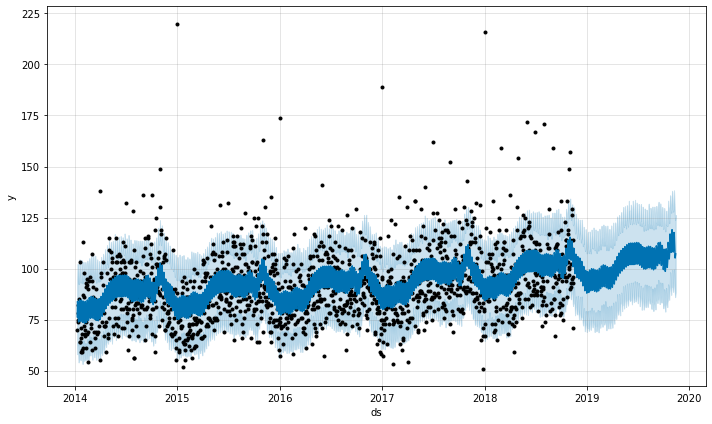

In [350]:
fig1 = m.plot(forecast)

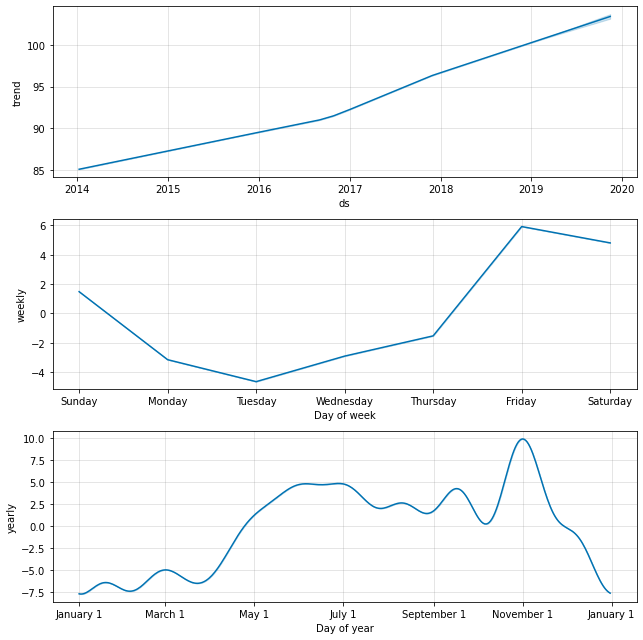

In [351]:
fig2 = m.plot_components(forecast)